# Merced land use classification

Some default settings.

In [10]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=UserWarning)
warnings.simplefilter(action="ignore", category=RuntimeWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14
from sklearn.utils import check_random_state


## Data augmentation 

Generate 50 new images for every image in the dataset ("data augmentation") and save them in a separate directory.

In [13]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import os
from PIL import Image

#Create an instance of ImageDataGenerator
datagen = ImageDataGenerator(
            rescale=1./255,
            rotation_range=180,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            channel_shift_range=0.1,
            horizontal_flip=True,
            vertical_flip=True,
            fill_mode='nearest')

#Grep input files
thispath = os.getcwd()
cats = os.listdir( str( '%s/UCMerced_LandUse/Images/'%thispath ) )

#Create directory to dump transformed files
os.system( str( 'mkdir %s/TransformedFiles'%thispath ) )

#Make 10 "random" copies for each image of each category.
for cat in cats:
    indir = str( '%s/UCMerced_LandUse/Images/%s'%(thispath,cat) )
    print('Transforming files in %s'%indir)
    files=os.listdir( indir )
    outdir = str( '%s/TransformedFiles/%s'%(thispath,cat) )
    os.system( str( 'mkdir -p %s'%outdir ) )
    filenum=0
    for file in files:
        img = load_img( indir + '/' + file )
        x = img_to_array(img) 
        x = x.reshape((1,) + x.shape)  
        i = 0
        for batch in datagen.flow(x, 
                                  batch_size=1,
                                  save_to_dir=outdir, 
                                  save_prefix=cat+'_new_'+str(filenum), 
                                  save_format='tif'):
            i += 1
            if i >= 50:
                break
        filenum += 1

Transforming files in /Users/Vincenzo/Desktop/EPFL/AdvancedComputingTechniques/Exercises/advanced-comp-2017/FinalProject/UCMerced_LandUse/Images/agricultural
Transforming files in /Users/Vincenzo/Desktop/EPFL/AdvancedComputingTechniques/Exercises/advanced-comp-2017/FinalProject/UCMerced_LandUse/Images/airplane
Transforming files in /Users/Vincenzo/Desktop/EPFL/AdvancedComputingTechniques/Exercises/advanced-comp-2017/FinalProject/UCMerced_LandUse/Images/baseballdiamond
Transforming files in /Users/Vincenzo/Desktop/EPFL/AdvancedComputingTechniques/Exercises/advanced-comp-2017/FinalProject/UCMerced_LandUse/Images/beach
Transforming files in /Users/Vincenzo/Desktop/EPFL/AdvancedComputingTechniques/Exercises/advanced-comp-2017/FinalProject/UCMerced_LandUse/Images/buildings
Transforming files in /Users/Vincenzo/Desktop/EPFL/AdvancedComputingTechniques/Exercises/advanced-comp-2017/FinalProject/UCMerced_LandUse/Images/chaparral
Transforming files in /Users/Vincenzo/Desktop/EPFL/AdvancedComputi

Example of how images are transformed with data augmentation (left: original image, from 2nd to 5th: transformed images)

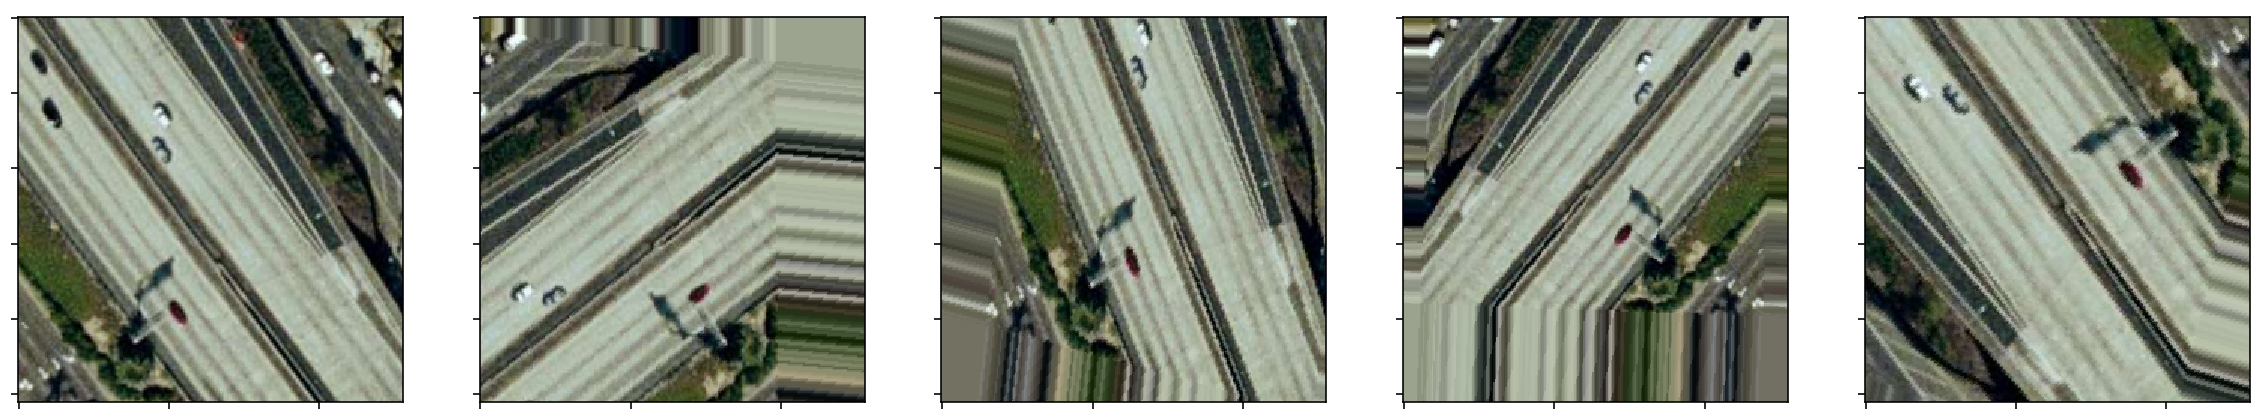

In [14]:
from IPython.display import Image, display, FileLinks
import matplotlib.image as mpimg
images = ['freeway00','freeway_new_0_0_47','freeway_new_0_0_50','freeway_new_0_0_493','freeway_new_0_0_720']
fig, axs = plt.subplots(1, len(images), figsize=(20, 20))
imgs = []
for i in range(len(images)):
    ax = axs[i]
    imgs.append(mpimg.imread(thispath+"/data_augmentation_examples/"+images[i]+".tif"))
    ax.imshow(imgs[i])
    ax.set_yticklabels([])
    ax.set_xticklabels([])

Now load and save all data into numpy arrays.

In [57]:
from keras.utils import np_utils

thispath = os.getcwd()
cats = os.listdir( str( '%s/UCMerced_LandUse/Images/'%thispath ) )

X_temp = []
y_temp = []
icat=0
for cat in cats:
    #First take original files
    indir = str( '%s/UCMerced_LandUse/Images/%s'%(thispath,cat) ) 
    files=os.listdir( indir )
    ifile=0
    for file in files:
        img = load_img( indir + '/' + file )
        x = img_to_array(img) 
        X_temp.append(x)
        y_temp.append(icat)
        ifile += 1
        if ifile==5:
            break
    #Then take transformed files
    indir = str( '%s/TransformedFiles/%s'%(thispath,cat) )
    files=os.listdir( indir )
    ifile=0
    for file in files:
        img = load_img( indir + '/' + file )
        x = img_to_array(img) 
        X_temp.append(x)
        y_temp.append(icat)
        ifile += 1
        if ifile==5:
            break
    icat += 1
y = np.array(y_temp)
y = np_utils.to_categorical(y, len(cats))
X = [X_temp[0]]
for i in range(1, len(cats)):
    X.append(X_temp[i])
X = np.array(X) 